# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Automne 2018 - TP3 - Machine Learning

**Date de rendu: 6 Décembre**

**Fichiers à rendre:**
    * TP3_FR.ipynb complété
    * SoftmaxClassifier.py complété
    * test_prediction.csv le fichier de résultat

## Introduction

Le but de ce TP est de vous donner un aperçu du déroulement général d'un projet de machine learning tout en vous familiarisant avec des librairies python adaptées.


Dans la première partie, vous implémenterez un algorithme de classification multiclasse appelé **softmax regression** à l'aide uniquement de la bibliothèque **numpy** et l'intégrerez à la bibliothèque **scikit-learn**.

Dans la deuxième partie, vous prendrez connaissance du **dataset** utilisé pour ce projet. Et vous serez amenés à effectuer le **preprocessing** de ces données pour qu'elles soient utilisables dans les algorithmes de machine learning classiques. Vous utiliserez les bibliothèques **pandas** et **scikit-learn**.

Enfin, dans la troisième partie, vous comparerez l'efficacité du modèle que vous avez implémenté avec d'autres modèles déjà implémentés dans **sklearn**. Puis vous tenterez d'améliorer les performances de l'algorithme sélectionné.

Pour enfin soumettre vos résultats sur la plateforme **kaggle**.

## Installation

Pour installer **pandas** et **scikit-learn** le plus simple est de télécharger et d'installer **Anaconda** qui regroupe les packages les plus utilisés pour le calcul scientifique et la science des données.

Vous trouverez la distribution ici : https://www.anaconda.com/download/#linux .

Assurez-vous d'avoir la version **20.0** de **scikit-learn**.

## Bonus 1: Compétition (2 points)

Quand vous aurez terminé le TP, vous pourrez soumettre vos prédictions sur **kaggle**, vous obtiendrez votre performance en terme de **log loss**.
Vous pouvez ensuite me communiquer ce résultat par mail (laurent.boucaud@polymtl.ca) et me joindre votre fichier de prédiction sur l'ensemble de test(pour vérification).

Une conversation dans le forum sera créée pour tenir à jour le meilleur score obtenu par une des équipes du cours.

Tant qu'aucun forum n'est créé, **ne m'envoyez pas vos performances si elles sont supérieures à 0.8 de log loss**.

Une fois le premier meilleur score affiché dans le forum, **ne me communiquez vos résultats que si votre log loss est inférieure au précédent meilleur score**.

Le nombre de points obtenus sera proportionnel au classement des équipes.

# 1. Softmax Regression (10 points)

Dans cette partie vous implémenterez **softmax regression** la variante de **logistic regression** qui permet d'effectuer de la classification pour un nombre de classe supérieur à 2.

Le code à compléter se trouve dans le fichier **SoftmaxClassifier.py**. 

**Pour cet exercice, la contrainte est d'utiliser uniquement la bibliothèque numpy**

## Encapsulation avec sklearn

La classe **SoftmaxClassifier** hérite des classes **BaseEstimator** et **ClassifierMixin** de **scikit-learn** ce qui nous permettra d'utiliser facilement avec notre classifier les outils fournis par scikit-learn dans la suite du TP.

Pour la compatibilité, le classifier implémente obligatoirement les méthodes:

* **fit**: responsable de l'entraînement du modèle
* **predict_proba**: permet de prédire la probabilité de chaque classe pour chaque exemple du dataset fourni.
* **predict**: permet de prédire la classe pour chaque exemple du dataset fourni.
* **score**: permet de quantifier l'écart entre les classes prédites et les classes réelles pour le dataset fourni


## Train/Test set:

Quand on veut tester les performances de l'apprentissage d'un algorithme de machine learning, on **ne le teste pas sur les données utilisées pour l'apprentissage**.

En effet, ce qui nous intéresse c'est que notre algorithme soit **capable de généraliser** ses prédictions à des données qu'il n'a **jamais vu**.

Pour illustrer, si on teste un algorithme sur les données d'entrainement, on teste sa capacité à **apprendre par coeur** le dataset et non à **généraliser**.

Par conséquent, quand on reçoit un nouveau dataset, la première chose à faire et de le **diviser en deux parties**: un ensemble d'**entraînement** (**70-80%** du dataset) et un ensemble de **test**(**20-30%** du dataset).

Tous les algorithmes de **traitement des données** et d'apprentissage devront être appris uniquement sur l'ensemble d'entraînement et appliqués ensuite sur l'ensemble de test.

Cela garantit l'absence de connaissances préalables de l'ensemble de test lors de l'entrainement.

## Gradient descent

La descente de gradient est un algorithme qui permet trouver la solution optimale d'un certains nombre de problèmes. Le principe est le suivant: on définit une **fonction de coût J**  qui caractérise le problème.
Cette fonction dépend d'un ensemble de **paramètres $\theta$ **. La descente de gradient cherche à **minimiser** la fonction de coût en **modifiant itérativement** les paramètres.

### Gradient

Le gradient de la fonction de coûts pour un $\theta$ donné, correspond à la direction dans laquelle il faut modifier $\theta$ pour réduire la valeur de la fonction de coût. 

La fonction de coût est minimale quand le gradient est nul.

Concrètement, on initialize $\theta$ aléatoirement, et on effectue à chaque itération un pas pour réduire la fonction de coût jusqu'à convergence de l'algorithme à un minimum.

### Learning rate

Le taux d'apprentissage correspond à la taille du pas que l'on va effectuer dans la direction du gradient.
Plus il est grand, plus la convergence est rapide mais il y a un risque que l'algorithme diverge.

Plus il est petit, plus la convergence est lente.

### Batch gradient descent

Il existe plusieurs algorithmes de descente de gradient. Nous utiliserons Batch gradient descent.

Dans cet algorithme, avant de mettre à jour $\theta$, on calcule les gradients sur l'ensemble des exemples d'entraînement.

### Epoch

Il s'agit d'un pas de la descente de gradient, soit une unique mise à jour de gradient.

### Bias/Variance tradeoff

Lorsqu'on entraine un algorithme de machine learning on cherche un équilibre entre **biais** et **variance**.

Un modèle avec un **biais fort**, est un modèle qui est **trop simple** pour la structure donnée considérée (modèle linéaire pour données quadratiques), cela limite la capacité du modèle à généraliser. On appelle aussi le biais **underfitting**.

Un modèle avec une **variance élevée** signifie qu'il est sensible aux petites variations dans les données d'entrainement, cela correspond à l'**overfitting**, c'est-à-dire que le modèle est trop proche de la structure de l'ensemble d'entrainement ce qui **limite sa capacité à généraliser**.

Un modèle avec un **biais important** aura une **mauvaise performance** sur l'ensemble d'**entraînement**.
Un modèle avec une **variance importante** aura une performance bien **moins bonne** sur l'ensemble de **test** que sur l'ensemble d'**entrainement**.


### One-hot-encoding

En machine learning pour représenter un vecteur de données catégoriques, on utilise le one-hot encoding.

Pour un vecteur comportant 5 exemples et 3 catégories différentes, on le représente sous forme d'une matrice de taille 5 par 3. Cette matrice est entièrement remplie de 0 sauf à l'indice correspondant au numéro de la classe pour chaque exemple.


Par exemple
$ y = \left(\begin{array}{cc} 
1 \\
1 \\
2 \\
3 \\
2 \\
\end{array}\right) $

devient:

$ yohe =  \left(\begin{array}{cc} 
1. & 0. & 0.\\
1. & 0. & 0.\\
0. & 1. & 0.\\
0. & 0. & 1.\\
0. & 1. & 0.\\
\end{array}\right) $


#### Question 1 (1 point)
Implémentez  la fonction  **_one_hot**  dans SoftmaxClassifier.py

In [1]:
from SoftmaxClassifier import SoftmaxClassifier
import numpy as np

softmax = SoftmaxClassifier(use_zero_indexed_classes = False)
softmax._one_hot(np.array([1,1,2,3,1]))

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Matrice de poids

Soit $ X_{m * n} $ la matrice d'exemple et $ \Theta _{n*K} $ la matrice de poids avec:

* **m** le nombre d'exemples
* **n** le nombre de features
* **k** le nombre de classes

Il est d'usage d'ajouter une colonne supplémentaire à X, cette colonne est remplie de 1. Pour prendre en compte ce changement, il faut rajouter une ligne à la matrice $\Theta$.

On obtient X_bias$_{m*(n+1)}$ et $ \Theta _{(n+1)*K} $


Intuitivement, à chaque classe K est associée une colonne de $\theta$.

On note $\theta_k$ le vecteur de dimension n+1 la colonne de poids associée à la prédiction de la classe k.

$\Theta$ = [$\theta_0$,$\theta_1$... $\theta_k$ ... $\theta_n$ ]

Ainsi $ z = x * \Theta $ donne un vecteur de dimension K qui correspond aux **logits** associés à x pour chacune des classes.

#### Question 2 (1 point)
Dans la fonction  **fit**  dans SoftmaxClassifier.py instanciez X_bias et initialisez $\Theta$ aléatoirement. (ligne 74)

In [3]:
softmax = SoftmaxClassifier(use_zero_indexed_classes = True)
softmax.fit(np.zeros((5, 5)), y=np.array([0, 1, 2, 3, 4]))

Epoch 0: Loss: 41.55135133421576
Epoch 1: Loss: 362.2185697332939


SoftmaxClassifier(alpha=100, early_stopping=True, eps=1e-05, lr=0.1,
         n_epochs=1000, regularization=True, threshold=1e-10,
         use_zero_indexed_classes=None)

### Softmax

On veut convertir le vecteur de logits **z** obtenu dans la partie précédente, en un **vecteur de probabilité**.

Pour cela on définit la **fonction softmax**:

$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$

Intuitivement, pour un logit de z, $z_k$, on prend l'exponentielle de cette valeur et on la divise par la somme des exponentielles de chaque logit du vecteur **z**. On obtient  $\hat{p_x}^k$ la probabilité que l'exemple **x** appartienne à la classe **k**.

On réitère l'opération pour chaque logit du vecteur **z**. 

On obtient ainsi un vecteur de probabilités $\hat{p_x}$ pour un exemple **x**. 

La division permet de rendre la somme des termes du vecteur $\hat{p_x}$ égale à 1 ce qui est indispensable dans le cadre des probabilités.

#### Question 3 (1 point)
Implémentez  la fonction  **_softmax**  dans SoftmaxClassifier.py

In [4]:
softmax._softmax(np.array([0.5, 0.7, 0.8, 0.2, 0.1]))

array([0.20070649, 0.24514346, 0.27092543, 0.14868703, 0.13453759])

#### Question 4 (1 point)
En utilisant la fonction **_softmax** de la question 3, implémentez  les fonctions  **predict_proba** et **predict**  dans SoftmaxClassifier.py

In [5]:
x = np.random.rand(5,5)
y = np.array([0, 1, 2, 3, 4])
predict_proba = softmax.predict_proba(x)
softmax.predict(x)

array([3, 3, 3, 3, 3], dtype=int64)

### Fonction de coût Log loss

Soit la fonction de coût log loss (ou cross entropy):

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

**Détail d'implémentation:** La fonction n'est pas définie pour des valeurs de probabilité de 0. ou 1., il faut donc s'assurer que étant donné $\epsilon$, les probabilités sont comprises dans [$\epsilon$, 1. - $\epsilon$].
#### Question 5 (1 point)
Implémentez  la fonction  **_cost_function**  dans SoftmaxClassifier.py en prenant en compte le **détail d'implémentation** (variable self.eps) et utilisez-la pour calculer la variable **loss** dans la fonction **fit** (ligne 84)

In [6]:
softmax._cost_function(predict_proba, y)

3255.737226372407

### Gradient de la fonction de coût

Le **gradient de J** par rapport à la classe k (par rapport à $\theta_k$) est :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}( \hat{p_k}^i - y_k^i)x^i  $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Sous **forme matricielle**, on peut écrire le **gradient de J par rapport à $\Theta$**:
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat{p} - y_{ohe}) $$

avec:
* $\hat{p}$ la matrice de probabilité prédite pour chaque example et pour chaque classe
* $y_{ohe}$ la version one-hot de y
* $X_{bias}^T$  la matrice transposée de $X_{bias}$
* **\*** le produit matriciel

#### Question 6 (1 point)
Implémentez  la fonction  **_get_gradient**  dans SoftmaxClassifier.py

In [7]:
X_bias = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
softmax._get_gradient(X_bias, y, predict_proba)

array([[ -10.09144948,   87.01840292,   -9.35433952,   26.36411979,
        -118.64888728],
       [-180.81938476,  153.84727802,  123.76701448,  112.53916707,
         -94.8440082 ],
       [   6.90302727, -145.65650593,  -16.66214721,   60.18856204,
          65.9110552 ],
       [ -83.85353607,    9.59249243,  -84.89527952, -123.25427742,
         160.61312637],
       [  31.80099142,   20.56988735,   69.87227582,   66.5788737 ,
         -68.22421262],
       [-130.52950168,   43.11911712,   46.35295988,  207.27657928,
         -53.29816305]])

### Mise à jour des poids

Quand le gradient a été calculé, il faut mettre à jour les poids avec ces gradients.

$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


avec:
* $\Theta$ la matrice de poids
* $\gamma$  le taux d'apprentissage
* $\Delta J( \Theta)$ le gradient de $J( \Theta)$ selon $\Theta$

#### Question 7 (1 point)
Mettez à jour la variable **self.theta_** dans la fonction **fit**  dans SoftmaxClassifier.py (ligne 85)

In [1]:
from SoftmaxClassifier import SoftmaxClassifier
import numpy as np

softmax = SoftmaxClassifier(alpha=0.1)
x = np.random.rand(3,3)
y = np.array([0, 1, 2])
softmax.fit(x, y).losses_

Epoch 0: Loss: 1.296101877278133
Epoch 1: Loss: 1.2832222282618129
Epoch 2: Loss: 1.2714104066009948
Epoch 3: Loss: 1.2605537401132996
Epoch 4: Loss: 1.2505513096156364
Epoch 5: Loss: 1.241312902097908
Epoch 6: Loss: 1.2327579997981615
Epoch 7: Loss: 1.2248148233711238
Epoch 8: Loss: 1.2174194398788727
Epoch 9: Loss: 1.2105149408337397
Epoch 10: Loss: 1.2040506916058606
Epoch 11: Loss: 1.1979816508233512
Epoch 12: Loss: 1.1922677566446662
Epoch 13: Loss: 1.1868733757266068
Epoch 14: Loss: 1.1817668101544194
Epoch 15: Loss: 1.1769198573931319
Epoch 16: Loss: 1.1723074183489324
Epoch 17: Loss: 1.167907148812747
Epoch 18: Loss: 1.163699149834875
Epoch 19: Loss: 1.1596656929069007
Epoch 20: Loss: 1.155790976175641
Epoch 21: Loss: 1.1520609082637971
Epoch 22: Loss: 1.1484629166105473
Epoch 23: Loss: 1.1449857775648424
Epoch 24: Loss: 1.1416194657603933
Epoch 25: Loss: 1.138355020572472
Epoch 26: Loss: 1.135184427702436
Epoch 27: Loss: 1.132100514157086
Epoch 28: Loss: 1.129096855087955
Epoc

Epoch 524: Loss: 0.8412393623651371
Epoch 525: Loss: 0.8411217578427552
Epoch 526: Loss: 0.8410045795044249
Epoch 527: Loss: 0.8408878256325858
Epoch 528: Loss: 0.8407714945185862
Epoch 529: Loss: 0.8406555844626125
Epoch 530: Loss: 0.8405400937736178
Epoch 531: Loss: 0.8404250207692524
Epoch 532: Loss: 0.8403103637757952
Epoch 533: Loss: 0.8401961211280853
Epoch 534: Loss: 0.8400822911694557
Epoch 535: Loss: 0.8399688722516656
Epoch 536: Loss: 0.8398558627348349
Epoch 537: Loss: 0.8397432609873807
Epoch 538: Loss: 0.8396310653859513
Epoch 539: Loss: 0.8395192743153634
Epoch 540: Loss: 0.8394078861685396
Epoch 541: Loss: 0.8392968993464467
Epoch 542: Loss: 0.8391863122580334
Epoch 543: Loss: 0.8390761233201702
Epoch 544: Loss: 0.8389663309575904
Epoch 545: Loss: 0.8388569336028295
Epoch 546: Loss: 0.838747929696167
Epoch 547: Loss: 0.8386393176855692
Epoch 548: Loss: 0.8385310960266315
Epoch 549: Loss: 0.8384232631825214
Epoch 550: Loss: 0.8383158176239229
Epoch 551: Loss: 0.8382087578

Epoch 938: Loss: 0.8155826107558006
Epoch 939: Loss: 0.8155546980196348
Epoch 940: Loss: 0.8155268793402621
Epoch 941: Loss: 0.8154991543902599
Epoch 942: Loss: 0.8154715228433871
Epoch 943: Loss: 0.8154439843745778
Epoch 944: Loss: 0.8154165386599371
Epoch 945: Loss: 0.8153891853767378
Epoch 946: Loss: 0.815361924203415
Epoch 947: Loss: 0.8153347548195621
Epoch 948: Loss: 0.8153076769059262
Epoch 949: Loss: 0.8152806901444044
Epoch 950: Loss: 0.8152537942180383
Epoch 951: Loss: 0.8152269888110114
Epoch 952: Loss: 0.8152002736086432
Epoch 953: Loss: 0.8151736482973859
Epoch 954: Loss: 0.8151471125648194
Epoch 955: Loss: 0.8151206660996478
Epoch 956: Loss: 0.8150943085916952
Epoch 957: Loss: 0.8150680397319002
Epoch 958: Loss: 0.8150418592123143
Epoch 959: Loss: 0.8150157667260942
Epoch 960: Loss: 0.8149897619675015
Epoch 961: Loss: 0.8149638446318956
Epoch 962: Loss: 0.8149380144157302
Epoch 963: Loss: 0.8149122710165508
Epoch 964: Loss: 0.814886614132989
Epoch 965: Loss: 0.81486104346

[1.296101877278133,
 1.2832222282618129,
 1.2714104066009948,
 1.2605537401132996,
 1.2505513096156364,
 1.241312902097908,
 1.2327579997981615,
 1.2248148233711238,
 1.2174194398788727,
 1.2105149408337397,
 1.2040506916058606,
 1.1979816508233512,
 1.1922677566446662,
 1.1868733757266068,
 1.1817668101544194,
 1.1769198573931319,
 1.1723074183489324,
 1.167907148812747,
 1.163699149834875,
 1.1596656929069007,
 1.155790976175641,
 1.1520609082637971,
 1.1484629166105473,
 1.1449857775648424,
 1.1416194657603933,
 1.138355020572472,
 1.135184427702436,
 1.132100514157086,
 1.129096855087955,
 1.1261676911321346,
 1.1233078550530626,
 1.1205127066187814,
 1.1177780747782267,
 1.1151002063049458,
 1.1124757201737543,
 1.1099015670207106,
 1.1073749931117167,
 1.1048935083111662,
 1.1024548576004445,
 1.1000569957476176,
 1.0976980647751664,
 1.095376373912821,
 1.0930903817581021,
 1.090838680398575,
 1.0886199812776298,
 1.0864331026101652,
 1.0842769581763427,
 1.0821505473408366,
 1.

### Regularization

Pour limiter l'**overfitting**, on utilise la régularisation, il s'agit d'ajouter un terme à la fonction de coût $J( \Theta)$.

Ce terme va ajouter des contraintes sur les poids du modèle lors de l'entrainement.
Nous allons utiliser la régularisation **L2** :

$$ L2(\Theta) = \alpha \sum_{\substack{1<=i<n}} \sum_{\substack{0<=k<K}} \theta_{i,k}^2 $$ 

avec:

* $\alpha$ le coefficient de régularisation

**Remarque:** La première somme ne commence pas à 0 mais à 1 parce qu'on ne régularise pas les poids associés à la colonne de biais de X.

Le fait d'ajouter ce terme conduit le modèle à apprendre les données tout en gardant ses poids le plus petit possible.



#### Question 8 (1 point)
Modifiez les fonctions  **_get_gradient** et **_cost_function** pour prendre en compte la régularisation lorsque le booléen self.regularization est vrai  dans SoftmaxClassifier.py

In [10]:
x = np.random.rand(3,3)
y = np.array([0, 1, 2])
predict_proba = softmax.predict_proba(x)
softmax.predict(x)
print(softmax._cost_function(predict_proba, y))
X_bias = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
softmax._get_gradient(X_bias, y, predict_proba)

1.1099713173900556


array([[-0.00268556,  0.12544371, -0.12278199],
       [-0.14902523,  0.17101884, -0.02199335],
       [-0.01405861,  0.11155239, -0.09752566],
       [ 0.02606476,  0.05169033, -0.07783228]])

#### Question 9 (1 point)

Le terme de régularisation est utilisé uniquement pendant l'entraînement. Quand on veut évaluer la performance du modèle **après entrainement**, on utilise la fonction de coût **non-régulée**.

Implémentez la fonction **score** qui permet d'évaluer la qualité de la prédiction **après entrainement** dans SoftmaxClassifier.py

In [11]:
softmax.score(x, y)

1.027683310392787

### Early stopping

Un trop grand nombre d'**epoch** peut résulter en **overfitting**.
Pour pallier à ce problème, on peut utiliser le mécanisme d'**early stopping**.
Il s'agit d'arrêter l'entraînement si la différence de la fonction de coût entre deux **epochs consécutives** est inférieure à un **seuil**.




#### Question 10 (1 point)

Finissez d'implémenter la fonction **fit** en y ajoutant le mécanisme d'**early stopping**  quand le booléen **self.early_stopping** est vrai le seuil est donné par la variable **self.threshold**.

In [13]:
from SoftmaxClassifier import SoftmaxClassifier
import numpy as np

softmax = SoftmaxClassifier(alpha=0.1, early_stopping=True, threshold=0.01)
x = np.random.rand(3,3)
y = np.array([0, 1, 2])
softmax.fit(x, y).losses_

Epoch 0: Loss: 1.204240472079345
Epoch 1: Loss: 1.1900723789260677
Epoch 2: Loss: 1.1770017239288029
Epoch 3: Loss: 1.1649439716031378
Epoch 4: Loss: 1.153817106863643
Epoch 5: Loss: 1.1435424218265626
Epoch 6: Loss: 1.1340451265119726


[1.204240472079345,
 1.1900723789260677,
 1.1770017239288029,
 1.1649439716031378,
 1.153817106863643,
 1.1435424218265626,
 1.1340451265119726]

## Test de la solution:

Le code ci-dessous importe le dataset de classification multiclasse **iris** disponible sur sklearn. Les données sont divisées en deux parties, l'ensemble d'entraînement et l'ensemble de test, puis elles sont normalisées.

Le classifier implémenté dans le fichier **SoftmaxClassifier.py** est importé puis entrainé sur l'ensemble d'entrainement et testé sur l'ensemble de test.

Le but de cette partie est juste de vérifier votre implémentation **quand vous êtes sûrs que votre code fonctionne**.

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
data,target =load_iris().data,load_iris().target

# split data in train/test sets
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.33, random_state=42)

# standardize columns using normal distribution
# fit on X_train and not on X_test to avoid Data Leakage
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [15]:
from SoftmaxClassifier import SoftmaxClassifier

# import the custom classifier
cl = SoftmaxClassifier(alpha=0.1, regularization = True, use_zero_indexed_classes = True)

# train on X_train and not on X_test to avoid overfitting
train_p = cl.fit_predict(X_train,y_train)
test_p = cl.predict(X_test)

Epoch 0: Loss: 1.57702980050155
Epoch 1: Loss: 1.400017762684575
Epoch 2: Loss: 1.252412087798319
Epoch 3: Loss: 1.1315009021143934
Epoch 4: Loss: 1.0334929831629573
Epoch 5: Loss: 0.9542842954499203
Epoch 6: Loss: 0.8900456955861324
Epoch 7: Loss: 0.8375242601467987
Epoch 8: Loss: 0.7941129130157841
Epoch 9: Loss: 0.7577916434867793
Epoch 10: Loss: 0.7270218309160695
Epoch 11: Loss: 0.7006384975084214
Epoch 12: Loss: 0.6777585212877599
Epoch 13: Loss: 0.657708667992966
Epoch 14: Loss: 0.6399714631796534
Epoch 15: Loss: 0.6241452948949169
Epoch 16: Loss: 0.6099152392702442
Epoch 17: Loss: 0.5970317432927577
Epoch 18: Loss: 0.5852949928560263
Epoch 19: Loss: 0.5745433789321783
Epoch 20: Loss: 0.5646449219984058
Epoch 21: Loss: 0.5554908416877968
Epoch 22: Loss: 0.5469906921640351
Epoch 23: Loss: 0.5390686489220795
Epoch 24: Loss: 0.5316606492534167
Epoch 25: Loss: 0.5247121709426752
Epoch 26: Loss: 0.5181764921644502
Epoch 27: Loss: 0.5120133172178716
Epoch 28: Loss: 0.5061876826673624


Epoch 393: Loss: 0.22163404119635044
Epoch 394: Loss: 0.22142307019546578
Epoch 395: Loss: 0.221212858241173
Epoch 396: Loss: 0.22100340155691572
Epoch 397: Loss: 0.22079469639089816
Epoch 398: Loss: 0.22058673901587475
Epoch 399: Loss: 0.22037952572894381
Epoch 400: Loss: 0.22017305285134176
Epoch 401: Loss: 0.2199673167282403
Epoch 402: Loss: 0.21976231372854635
Epoch 403: Loss: 0.21955804024470307
Epoch 404: Loss: 0.21935449269249382
Epoch 405: Loss: 0.21915166751084778
Epoch 406: Loss: 0.21894956116164804
Epoch 407: Loss: 0.21874817012954165
Epoch 408: Loss: 0.2185474909217512
Epoch 409: Loss: 0.21834752006788918
Epoch 410: Loss: 0.21814825411977373
Epoch 411: Loss: 0.21794968965124656
Epoch 412: Loss: 0.21775182325799286
Epoch 413: Loss: 0.21755465155736275
Epoch 414: Loss: 0.21735817118819536
Epoch 415: Loss: 0.2171623788106434
Epoch 416: Loss: 0.2169672711060013
Epoch 417: Loss: 0.2167728447765334
Epoch 418: Loss: 0.21657909654530533
Epoch 419: Loss: 0.21638602315601624
Epoch 42

Epoch 759: Loss: 0.17589510564994737
Epoch 760: Loss: 0.17582333407129952
Epoch 761: Loss: 0.1757517386559357
Epoch 762: Loss: 0.17568031882902865
Epoch 763: Loss: 0.17560907401813936
Epoch 764: Loss: 0.175538003653205
Epoch 765: Loss: 0.17546710716652658
Epoch 766: Loss: 0.17539638399275745
Epoch 767: Loss: 0.17532583356889084
Epoch 768: Loss: 0.17525545533424836
Epoch 769: Loss: 0.17518524873046823
Epoch 770: Loss: 0.17511521320149342
Epoch 771: Loss: 0.17504534819356
Epoch 772: Loss: 0.17497565315518593
Epoch 773: Loss: 0.1749061275371591
Epoch 774: Loss: 0.17483677079252619
Epoch 775: Loss: 0.17476758237658127
Epoch 776: Loss: 0.17469856174685455
Epoch 777: Loss: 0.174629708363101
Epoch 778: Loss: 0.1745610216872893
Epoch 779: Loss: 0.1744925011835909
Epoch 780: Loss: 0.17442414631836875
Epoch 781: Loss: 0.17435595656016645
Epoch 782: Loss: 0.17428793137969742
Epoch 783: Loss: 0.17422007024983396
Epoch 784: Loss: 0.1741523726455966
Epoch 785: Loss: 0.17408483804414332
Epoch 786: Lo

Si vous obtenez des valeurs relativement proches pour l'ensemble de test et d'entrainement, et qu'elles sont au moins supérieures à 0.8, votre modèle devrait être correct

In [16]:
from sklearn.metrics import precision_recall_fscore_support

# display precision, recall and f1-score on train/test set
print("train : "+ str(precision_recall_fscore_support(y_train, train_p,average = "macro")))
print("test : "+ str(precision_recall_fscore_support(y_test, test_p,average = "macro")))

train : (0.9729729729729729, 0.9714285714285714, 0.9709901198234182, None)
test : (0.9791666666666666, 0.9791666666666666, 0.978494623655914, None)


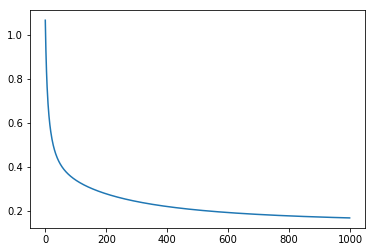

In [7]:
import matplotlib.pyplot as plt

plt.plot(cl.losses_)
plt.show()

# 2. Data preprocessing (8 points)

##  Kaggle 
Kaggle est un site dédié au machine learning. On y retrouve un grand nombre de dataset.
Des compétitions sont organisées par des organisations. Ces dernières fournissent un dataset et un objectif. Les "kagglers" qui participent à ces compétitions soumettent leurs résultats en ligne. Il y a souvent des prix ou des emplois pour ceux qui obtiennent les meilleurs résultats.

Il s'agit d'un bon moyen pour développer ses compétences en machine learning sur des vrais datasets.

Vous pouvez créer un compte si vous voulez comparer vos résultats à ceux déjà en ligne pour la dataset que nous allons étudier.

Vous pouvez créer un compte ici: https://www.kaggle.com/


## Austin Animal Center Shelter Animal Outcomes dataset
Le dataset que nous utiliserons est le "Animal Outcomes dataset" disponible à l'adresse suivante: https://www.kaggle.com/c/shelter-animal-outcomes.

Il s'agit d'un problème de **classification multiclasse** des animaux sont recueillis dans un refuge après avoir été abandonnés, le but est de prédire la manière dont ils vont "quitter " le lieu:
* Adoption
* Retour au propriétaire
* Décès 
* Euthanasie
* Transfert à un autre centre

Pour plus d'informations sur les données, rendez-vous sur kaggle.

## Déroulement d'un projet de machine learning

Le but de la suite de ce TP est de vous faire étudier une version simplifiée d'un projet complet de machine learning:

1. Nettoyage des données, traitement des valeurs manquantes
2. Mise en forme des données pour pouvoir les utiliser dans les algorithmes de machine learning
3. Feature engineering: transformation ou combinaison de features entre elles
4. Comparaison des performances des différents choix effectués lors du traîtement des données
5. Comparaison des performances de différents modèles (dont celui implémenté en première partie)
6. Optimisation des hyper-paramètres

## Scikit-learn
http://scikit-learn.org/stable/

Il s'agit d'une bibliothèque de machine learning et data mining, elle propose des outils pour l'analyse et le traîtement des données,  des algorithmes classiques de machine learning comme les réseaux de neuronnes, la régression logistique, les SVM ou autre, enfin des outils permettant de comparer les modèles entre eux comme la cross validation.

## Pandas

Une bibliothèque permettant de stocker des données et de les manipuler facilement

Les deux éléments de base de pandas sont le dataframe et la serie.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

## Data processing tutorial

**Avant de continuer le TP**, familiarisez-vous avec le **pré-traitement des données**, **pandas** et **scikit-learn**, un tutoriel est disponible dans le fichier: **data_processing_tutorial.ipynb**

## Dataset

#### Chargement de l'ensemble d'entraînement et de l'ensemble de test

In [1]:
import pandas as pd

PATH = "data/"
X_train = pd.read_csv(PATH + "train.csv")
X_test = pd.read_csv(PATH + "test.csv")

#### Suppression de colonnes inutiles

In [2]:
X_train = X_train.drop(columns = ["OutcomeSubtype","AnimalID"])
X_test = X_test.drop(columns = ["ID"])

In [3]:
X_train, y_train = X_train.drop(columns = ["OutcomeType"]),X_train["OutcomeType"]

#### 5 premiers exemples de l'ensemble d'entraînement

In [4]:
X_train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


#### 5 premiers exemples de l'ensemble de test

In [5]:
X_test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


#### 5 premiers exemples de l'attribut à prédire

In [6]:
y_train.head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

## Travail demandé

Pour vous faire gagner du temps, une partie des colonnes (Name,DateTime,color) ont déjà été traitées.


En vous appuyant sur le tutoriel fourni, vous devez écrire un pipeline complet de transformation pour chacune des colonnes restantes du dataset (AgeuponOutcome,AnimalType,SexuponOutcome, Breed).

Vous êtes **libres** de vos choix, mais vous devez les **justifer** colonne par colonne.
Par exemple, vous pouvez choisir de combiner des colonnes entre elles, de séparer une colonne en plusieurs ou encore d'éliminer complètement une colonne si vous le justifiez correctement.


La partie déjà prétraitée du dataset est chargée dans **X_train1** et **X_test1**

In [7]:
X_train1 = pd.read_csv("data/train_preprocessed.csv")
X_test1 = pd.read_csv("data/test_preprocessed.csv")

In [8]:
X_train1.head()

,Color,HasName,Month,Day,Hour
0,0.973624,1.0,2.0,1.0,3.0
1,-1.421532,1.0,10.0,1.0,2.0
2,0.973624,1.0,1.0,3.0,2.0
3,-1.471381,0.0,7.0,1.0,3.0
4,-0.868974,0.0,11.0,1.0,2.0


Le reste du dataset que vous devez traiter est:

In [9]:
X_train = X_train.drop(columns = ["Color","Name","DateTime"])
X_test = X_test.drop(columns = ["Color","Name","DateTime"])

In [10]:
X_train.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix
1,Cat,Spayed Female,1 year,Domestic Shorthair Mix
2,Dog,Neutered Male,2 years,Pit Bull Mix
3,Cat,Intact Male,3 weeks,Domestic Shorthair Mix
4,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle


####  Question 11: AgeuponOutcome (1 point)

On remplit d'abord les valeurs NaN avec la valeur textuelle la plus courante trouvée, c'est-à-dire "1 year". Cela nous permet ensuite d'appliquer une fonction de transformation personnalisée, qui va lire la string de forme "X day/week/month/year(s)" et la transformer en valeur numérique correspondant à l'âge en jours de l'animal. Finalement, on normalise ces valeurs numériques

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def parse_age(text):
    time = 0.0
    multiplier, timeframe = text.split(" ")
    multiplier = float(multiplier)
    if "day" in timeframe:
        time = multiplier
    elif "week" in timeframe:
        time = multiplier * 7.0
    elif "month" in timeframe:
        time = multiplier * (365.25/12.0)
    elif "year" in timeframe:
        time = multiplier * 365.25
    return time

# 1 year est l'entrée la plus courante selon value_counts()
age_imputer = SimpleImputer(strategy = 'constant', fill_value = '1 year')
age_scaler = StandardScaler()

X_train["AgeuponOutcome"] = age_imputer.fit_transform(X_train["AgeuponOutcome"].values.reshape(-1,1))
X_test["AgeuponOutcome"] = age_imputer.transform(X_test["AgeuponOutcome"].values.reshape(-1,1))

X_train["AgeuponOutcome"] = X_train.apply(lambda row: pd.Series(parse_age(row["AgeuponOutcome"])), axis=1)
X_test["AgeuponOutcome"] = X_test.apply(lambda row: pd.Series(parse_age(row["AgeuponOutcome"])), axis=1)

X_train["AgeuponOutcome"] = age_scaler.fit_transform(X_train["AgeuponOutcome"].values.reshape(-1,1))
X_test["AgeuponOutcome"] = age_scaler.transform(X_test["AgeuponOutcome"].values.reshape(-1,1))

X_train.head()
X_test.head()


,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Intact Female,-0.453005,Labrador Retriever Mix
1,Dog,Spayed Female,-0.059510,German Shepherd/Siberian Husky
2,Cat,Neutered Male,-0.396792,Domestic Shorthair Mix
3,Dog,Intact Male,-0.621646,Collie Smooth Mix
4,Dog,Neutered Male,-0.059510,Miniature Poodle Mix


#### Question 12: AnimalType (1 point)

On élimine la colonne AnimalType pour la transformer en une simple catégorisation Vrai/Faux pour si c'est un chien ou non. En effet, on a seulement deux types d'animaux : Chien et Chat. Faire cela nous permet d'encoder la valeur en 0 ou 1, la rendant fonctionnelle pour le modèle.

In [12]:
from sklearn.preprocessing import LabelEncoder

dog_label = LabelEncoder()

X_train["IsDog"] = dog_label.fit_transform(X_train["AnimalType"].values)
X_test["IsDog"] = dog_label.transform(X_test["AnimalType"].values.reshape(-1,1))

X_train = X_train.drop(columns = ["AnimalType"])
X_test = X_test.drop(columns = ["AnimalType"])
X_train.head()
X_test.head()

/usr/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,SexuponOutcome,AgeuponOutcome,Breed,IsDog
0,Intact Female,-0.453005,Labrador Retriever Mix,1
1,Spayed Female,-0.059510,German Shepherd/Siberian Husky,1
2,Neutered Male,-0.396792,Domestic Shorthair Mix,0
3,Intact Male,-0.621646,Collie Smooth Mix,1
4,Neutered Male,-0.059510,Miniature Poodle Mix,1


#### Question 13: SexuponOutcome (1 point)

...

In [14]:
X_train["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

#### Question 14: Breed (1 point)

...

In [17]:
X_train["Breed"].value_counts()

Domestic Shorthair Mix                          8810
Pit Bull Mix                                    1906
Chihuahua Shorthair Mix                         1766
Labrador Retriever Mix                          1363
Domestic Medium Hair Mix                         839
German Shepherd Mix                              575
Domestic Longhair Mix                            520
Siamese Mix                                      389
Australian Cattle Dog Mix                        367
Dachshund Mix                                    318
Boxer Mix                                        245
Miniature Poodle Mix                             233
Border Collie Mix                                229
Australian Shepherd Mix                          163
Rat Terrier Mix                                  157
Catahoula Mix                                    157
Jack Russell Terrier Mix                         146
Yorkshire Terrier Mix                            143
Domestic Shorthair                            

### Pipeline
**Question 15: Complétez pipeline ci-dessous (4 points)**

In [ ]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

# pipeline_color = Pipeline([
#     ("name", Transformer()),
# ])


# full_pipeline = ColumnTransformer([
#         ("color", pipeline_color, ["Color"]),
        

#     ])

Lancez le pipeline

In [ ]:
# column_names = []
# X_train_prepared = pd.DataFrame(full_pipeline.fit_transform(X_train),columns = columns)
# X_test_prepared = pd.DataFrame(full_pipeline.fit_transform(X_test),columns = columns)

#### Concaténation des deux parties du dataset:

In [ ]:
# X_train = pd.concat([X_train1,X_train_prepared], axis = 1)
# X_test = pd.concat([X_test1,X_test_prepared], axis = 1)

# 3. Model selection (2 points)

Encodage de la classe cible sous forme d'entiers pour l'utiliser
avec les algorithmes de scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)

## Ensemble de validation
Pour comparer différents modèles entre eux, on ne peut pas utiliser
l'ensemble de test, sinon on serait tenté de garder le modèle correspondant le mieux à l'ensemble de test ce qui pourrait conduire à l'overfitting.

Il est d'usage de créer un nouvel ensemble de la taille de l'ensemble de test, l'ensemble de **validation**.


## Cross-validation

La cross-validation est une méthode utile pour comparer la performance de différents modèles de machine learning **sans créer d'ensemble de validation**.

Il existe différents types de cross-validation, la procédure la plus classique est la suivante:
* Diviser aléatoirement l'ensemble d'entraînement en deux parties (90%/10% par exemple).
* Entraîner le modèle sur la plus grande partie, et le tester sur l'autre partie.
* Recommencer n fois
* Calculer la moyenne et l'écart type des résultats

Les avantages sont les suivants:
* Considérer la totalité de l'ensemble d'entraînement pour l'évaluation (sans se priver de l'ensemble de validation)
* Obtenir l'écart-type des résultats permet une meilleure évaluation de la précision du modèle.

L'inconvénient principal est le temps de calcul, étant donné que l'on effectue l'apprentissage du modèle plusieurs fois, cette méthode peut être impossible pour des datasets contenant un grand nombre d'exemple (> 10e5)



## Bonus 2: StratifiedKFold (1 point)

En observant la distribution des classes de l'attribut cible (à l'aide des fonctions de visualisation de pandas), justifiez l'utilisation de l'objet **StratifiedKFold** de sklearn pour la division de l'ensemble d'entraînement lors de cross-validation en comparaison à une méthode pûrement **aléatoire**.

## Question 16: (1 point)


**Choisir au moins deux modèles permettant la classification multiclasse sur sklearn en plus du modèle implémenté dans la première partie du TP**.

**Complétez la fonction compare qui effectue la crossvalidation pour différents modèles et différentes métriques, et renvoie la liste des moyennes et écart-types pour chacune des métriques, pour chacun des modèles. **

**En vous basant sur les différentes métriques, concluez quant au modèle le plus performant.**

Evaluez les modèles pour les différentes métriques proposées:
* **log loss**: c'est la métrique d'évaluation de kaggle
* **precision**: correspond à la qualité de la prédiction, le nombre de classes correctement prédites par le nombre de prédiction total
* **recall**: le nombre d'éléments appartenant à une classe, identifiés comme tel, divisé par le nombre total des éléments de cette classe.
* **f-score**: une moyenne de la precision et du recall

**Remarque: precision et recall sont deux mesures complémentaires pour l'évaluation d'un modèle de classification multi-classe.**

Dans le cas d'une classification binaire avec un déséquilibre de la classe cible important, (90%/10%), en évaluant le résultat de la classification avec l'accuracy (nombre de prédictions correctes divisé par le nombre de prédictions total), on peut obtenir un très bon score (90% d'accuracy) en choisissant de prédire systématiquement la classe majoritaire.

Dans un tel cas, la precision serait élevée de même, mais le recall serait très bas , nous indiquant la médiocrité de notre modèle.


In [ ]:
def compare(models,X_train,y_train,nb_runs):
    losses = []
    
    return losses

In [ ]:
from SoftmaxClassifier import SoftmaxClassifier

nb_run = 3

models = [
    SoftmaxClassifier(),
]

scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']

compare(models,X_train,y_train_label,nb_run,scoring)

...

## Question 17: Matrice de confusion (0.5 point)

La matrice de confusion A est telle que $A_{i,j}$ correspond au nombre d'exemples de la classe i classifié comme appartenant à la classe j.

Entrainez le modèle sélectionné sur la totalité de l'ensemble d'entraînement.
A l'aide de la matrice de confusion et de la distribution des classes, analysez plus en détail les performances du modèle choisi et justifiez les.

In [ ]:
# Train selected model

selected_model = 
y_pred = selected_model.fit_predict(X_train,y_train_label)

###### Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, index = target_label.classes_)

###### Distribution des classes

In [ ]:
import matplotlib.pyplot as plt 
print(target_label.classes_)
pd.Series(y_train_label).hist()

## Bonus 3: Optimisation des hyper-paramètres (1 point)

Les hyper-paramètres sont les paramètres fixés avant la phase d'apprentissage. Pour optimiser les performances du modèle, on peut sélectionner les meilleurs hyper-paramètres.

A l'aide de sklearn, optimisez les hyper-paramètres du modèle que vous avez sélectionné et montrez que les performances ont été améliorées.
Vous pouvez utiliser par exemple: **GridSearchCV**


## Question 18: Soumission (0.5 point)

Enfin, effectuez la prédiction sur l'ensemble de test et joignez vos résultats au rendu du TP.

**Optionnel**: Vous pouvez soumettre vos résultats sur kaggle et noter votre performance en terme de log loss.

In [ ]:
# best_model = 
# pred_test = pd.Series(best_model.transform(X_test))
# pred_test.to_csv("test_prediction.csv",index = False)